## Imports

In [1]:
try:
        
    import h5py
    
    from ipywidgets import widgets, Layout, interact, interactive, interactive_output, Dropdown
    from IPython.display import display
    import matplotlib.pyplot as mplt
    import scipy
    from sympy import symbols, Eq, solve
    import numpy as np
    import random
    import seaborn as sns 
    import pandas as pd
    import graphing as gr
    #!pip install viola
    ########## Modules required for artist drawing on matplotlib
    import matplotlib.path as mpath
    import matplotlib.lines as mlines
    import matplotlib.patches as mpatches
    from matplotlib.collections import PatchCollection
    
      
except ModuleNotFoundError:
        print("A class you are trying to import is not present in the directory")
    
except Exception:
        print("Something went wrong - modules have not been imported")

else: 
    print("All relevant classes imported")

All relevant classes imported


## Select file

In [71]:
#######################################################
#### GUI 

edt_filename = widgets.Text(description = 'File name', value=' Exp6_gk200_1')
btn_select = widgets.Button(description = 'Select file',button_style='success')
output_file = widgets.Output()

display(edt_filename, btn_select,output_file)



#######################################################
#### FUNCTIONS


#df_flux = pd.DataFrame({'Compartment':[],'Na_net':[], 'Na_leak':[],'Na_Atpase':[], 'K_net':[],'K_leak':[],'K_Atpase':[],'K_kcc2':[], 'Cl_net':[],'Cl_kcc2':[],'X':[],'z':[]  })
df_ed = pd.DataFrame({'Boundary':[],'Na':[],'K':[],'Cl':[]})



def btn_select_clicked(b):
    global file_name, df_end, df_start, df_end_flux, df_end_ed, df_end_net_flux
    file_name = "\\"
    file_name = file_name + edt_filename.value 
    
    
    try: 
        with h5py.File(file_name, mode='r') as hdf:
            
            print("File found and content loaded into memory")
            global C, comp_names_arr, intervals, interval_arr, t_arr,v_arr, na_arr,cl_arr,ecl_arr,g_syn_arr
            C = hdf.get('COMPARTMENTS')
            C_group_arr =[]
            t_arr_bool = True
            comp_names_arr= list(C.keys())
                        
            C1 = C.get(comp_names_arr[0])
            
            T = hdf.get('TIMING')
            total_t = T.get('TOTAL_T')[()]
            intervals = T.get('INTERVALS')[()]
            dt = T.get("DT")[()]
            #total_t = T.get('EXTENDED_TOTAL_T')[()]
            #intervals = T.get('EXTENDED_INTERVALS')[()]
            #dt = T.get("EXTENDED_DT")[()]
            
            total_steps = total_t /dt          
            interval_step = total_steps / intervals
            #interval_step =250000
            interval_arr = [round(interval_step * i) for i in range(intervals)]
            v_arr = []
            ecl_arr = []
            t_arr =[]   
            na_arr = []
            cl_arr = []
            g_syn_arr = []
            
            
            ##### LOADING COMPARTMENT DATA
            for e in range(len(comp_names_arr)):
                C_group = C.get(comp_names_arr[e])
                C_group_arr.append(C_group)
                       
                v_temp_arr = []
                #ecl_temp_arr = []
                #na_temp_arr = []
                #cl_temp_arr =[]
                #g_syn_temp_arr = []
                for j in range(len(list(C_group.keys()))):
                    dataset = C_group.get(str(interval_arr[j]))
                    if comp_names_arr[e] == 'Comp4' or comp_names_arr[e] == 'Comp8':
                        
                        v_temp_arr.append(dataset[-4]*1e3)
                        #ecl_temp_arr.append(dataset[-2]*1e3)
                        #na_temp_arr.append(dataset[4]*1e3)
                        #cl_temp_arr.append(dataset[6]*1e3)
                        #g_syn_temp_arr.append(dataset[-1]*1e9)
                    else:
                        v_temp_arr.append(dataset[-3]*1e3)
                        #ecl_temp_arr.append(dataset[-1]*1e3)
                        #na_temp_arr.append(dataset[4]*1e3)
                        #cl_temp_arr.append(dataset[6]*1e3)
                        #g_syn_temp_arr.append(dataset[-1]*1e9)
                    if t_arr_bool == True:
                        t_arr.append(dataset[0])
                    
                v_arr.append(v_temp_arr)
                #ecl_arr.append(ecl_temp_arr)
                #na_arr.append(na_temp_arr)
                #cl_arr.append(cl_temp_arr)
                #g_syn_arr.append(g_syn_temp_arr)
                t_arr_bool = False
                
            
         
            
    except: 
        raise("File not found")
        raise("File needs to be in base directory")


btn_select.on_click(btn_select_clicked)

Text(value=' Exp6_gk200_1', description='File name')

Button(button_style='success', description='Select file', style=ButtonStyle())

Output()

File found and content loaded into memory


10000
Peak somatic V: -49.9999

Total time: 199.98
Time at baseline soma: 5.0
Baseline Somatic V: -72.50759
Peak change in Somatic V: 22.50766
-72.4960998579676
-72.49282637345425
-72.49185816499596
-72.49024464790132
-72.4879067264191
-72.49123601046385
-72.4938383588473
-72.49575518589866
-72.49701668389423
-72.49764256700851


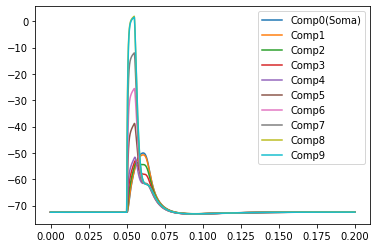

In [72]:
print(len(v_arr[0]))


peak_soma_v = -100
baseline_soma_v = v_arr[0][250]
peak_delta_soma_v = 0

for i in range(len(v_arr[0])):
    if v_arr[0][i] > peak_soma_v:
        peak_soma_v = v_arr[0][i]
        
    delta_soma = v_arr[0][i] - baseline_soma_v
    if delta_soma > peak_delta_soma_v:
        peak_delta_soma_v = delta_soma

        
        
print(f"Peak somatic V: {round(peak_soma_v,4)}")
print("")
print(f"Total time: {round(t_arr[-1]*1e3,2)}")
print(f"Time at baseline soma: {round(t_arr[250]*1e3,2)}")
print(f"Baseline Somatic V: {round(baseline_soma_v,5)}")
print(f"Peak change in Somatic V: {round(peak_delta_soma_v,5)}")

for i in range(len(v_arr)):
    mplt.plot(t_arr[1:],v_arr[i][1:],label=comp_names_arr[i])
    print(v_arr[i][1])
mplt.legend()

## v4 Figure 6b : g_KCC2 differences

C:\Users\Eran\AppData\Local\Temp/ipykernel_14736/2865011677.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_1.set_yticklabels(["No AP", "AP"])


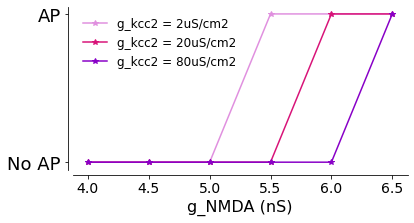

In [69]:
g_exc = [4,4.5,5,5.5,6,6.5]
gkcc2_arr = [ 'g_kcc2 = 2uS/cm2','g_kcc2 = 20uS/cm2','g_kcc2 = 80uS/cm2']


peak_soma_v_arr_gk1 = []
peak_soma_v_arr_gk1.append('0') #gk4
peak_soma_v_arr_gk1.append('0')
peak_soma_v_arr_gk1.append('0') #gk5
peak_soma_v_arr_gk1.append('1')
peak_soma_v_arr_gk1.append('1')
peak_soma_v_arr_gk1.append('1') #gk6.5


peak_soma_v_arr_gk2 = []
peak_soma_v_arr_gk2.append('0')
peak_soma_v_arr_gk2.append('0')
peak_soma_v_arr_gk2.append('0') #gk5
peak_soma_v_arr_gk2.append('0')
peak_soma_v_arr_gk2.append('1') #gk6
peak_soma_v_arr_gk2.append('1')


peak_soma_v_arr_gk3 = []
peak_soma_v_arr_gk3.append('0')
peak_soma_v_arr_gk3.append('0') 
peak_soma_v_arr_gk3.append('0') #gk5
peak_soma_v_arr_gk3.append('0')
peak_soma_v_arr_gk3.append('0') #gk6
peak_soma_v_arr_gk3.append('1')



fig_b,ax_1 = mplt.subplots(1,1,figsize=(6,3))
sns.despine(offset=5)
ax_1.plot(g_exc,peak_soma_v_arr_gk1,"*-", label =gkcc2_arr[0],color='#E090DF')
ax_1.plot(g_exc,peak_soma_v_arr_gk2,"*-", label =gkcc2_arr[1],color= '#D81378')
ax_1.plot(g_exc,peak_soma_v_arr_gk3,"*-", label =gkcc2_arr[2], color = '#8800C7')




#ax_1.set_ylabel("Peak Change in Somatic Potential (mV)", fontsize=16)
ax_1.set_yticklabels(["No AP", "AP"])
ax_1.set_xlabel("g_NMDA (nS)", fontsize=16)
ax_1.tick_params(axis='y', which='major', labelsize=18)
ax_1.tick_params(axis='x', which='major', labelsize=14)
ax_1.legend(fontsize =12, loc='upper left',frameon=False)

# v3 Figure 6b : g_KCC2 differences

In [2]:
g_exc = [4,4.5,5,5.5,6,6.5]
gkcc2_arr = [ 'g_kcc2 = 2uS/cm2','g_kcc2 = 20uS/cm2','g_kcc2 = 200us/cm2']


peak_soma_v_arr_gk1 = []
peak_soma_v_arr_gk1.append(round(13.96129,2)) #gk4
peak_soma_v_arr_gk1.append(round(15.705999,2))
peak_soma_v_arr_gk1.append(round(17.70292,2)) #gk5
peak_soma_v_arr_gk1.append(round(113.67656,2))
peak_soma_v_arr_gk1.append(round(118.4098,2))
peak_soma_v_arr_gk1.append(round(121.48672,2)) #gk6.5


peak_soma_v_arr_gk2 = []
peak_soma_v_arr_gk2.append(round(13.64238,2))
peak_soma_v_arr_gk2.append(round(15.32242,2))
peak_soma_v_arr_gk2.append(round(17.16305,2)) #gk5
peak_soma_v_arr_gk2.append(round(19.79593,2))
peak_soma_v_arr_gk2.append(round(118.34569,2)) #gk6
peak_soma_v_arr_gk2.append(round(121.03816,2))


peak_soma_v_arr_gk3 = []
peak_soma_v_arr_gk3.append(round(11.71816,2))
peak_soma_v_arr_gk3.append(round(13.16315,2)) 
peak_soma_v_arr_gk3.append(round(14.56132,2)) #gk5
peak_soma_v_arr_gk3.append(round(15.9724,2))
peak_soma_v_arr_gk3.append(round(17.49836,2)) #gk6
peak_soma_v_arr_gk3.append(round(19.43272,2))



fig_b,ax_1 = mplt.subplots(1,1,figsize=(6,6))
sns.despine(offset=5)
ax_1.plot(g_exc,peak_soma_v_arr_gk1,"*-", label =gkcc2_arr[0],color='#E090DF')
ax_1.plot(g_exc,peak_soma_v_arr_gk2,"*-", label =gkcc2_arr[1],color= '#D81378')
ax_1.plot(g_exc,peak_soma_v_arr_gk3,"*-", label =gkcc2_arr[2], color = '#8800C7')




ax_1.set_ylabel("Peak Change in Somatic Potential (mV)", fontsize=16)
ax_1.set_xlabel("g_NMDA (nS)", fontsize=16)
ax_1.tick_params(axis='y', which='major', labelsize=14)
ax_1.tick_params(axis='x', which='major', labelsize=14)
ax_1.legend(fontsize =12, loc='upper left',frameon=False)


NameError: name 'mplt' is not defined

# v2 Figure 6b : g_KCC2 differences

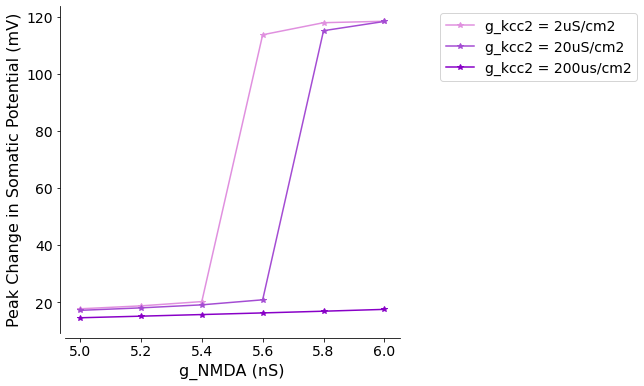

In [65]:
g_exc = [5,5.2,5.4,5.6,5.8,6]
gkcc2_arr = [ 'g_kcc2 = 2uS/cm2','g_kcc2 = 20uS/cm2','g_kcc2 = 200us/cm2']


peak_soma_v_arr_gk1 = []
peak_soma_v_arr_gk1.append(round(17.70292,2))
peak_soma_v_arr_gk1.append(round(18.72509,2))
peak_soma_v_arr_gk1.append(round(20.22933,2))
peak_soma_v_arr_gk1.append(round(113.67656,2))
peak_soma_v_arr_gk1.append(round(117.91062,2))
peak_soma_v_arr_gk1.append(round(118.4098,2))

peak_soma_v_arr_gk2 = []
peak_soma_v_arr_gk2.append(round(17.16305,2))
peak_soma_v_arr_gk2.append(round(18.03063,2))
peak_soma_v_arr_gk2.append(round(19.09464,2))
peak_soma_v_arr_gk2.append(round(20.84525,2))
peak_soma_v_arr_gk2.append(round(115.11092,2))
peak_soma_v_arr_gk2.append(round(118.34569,2))

peak_soma_v_arr_gk3 = []
peak_soma_v_arr_gk3.append(round(14.56132,2))
peak_soma_v_arr_gk3.append(round(15.12001,2))
peak_soma_v_arr_gk3.append(round(15.68534,2)) 
peak_soma_v_arr_gk3.append(round(16.26367,2))
peak_soma_v_arr_gk3.append(round(16.86365,2))
peak_soma_v_arr_gk3.append(round(17.49836,2))



fig_b,ax_1 = mplt.subplots(1,1,figsize=(6,6))
sns.despine(offset=5)
ax_1.plot(g_exc,peak_soma_v_arr_gk1,"*-", label =gkcc2_arr[0],color='#E090DF')
ax_1.plot(g_exc,peak_soma_v_arr_gk2,"*-", label =gkcc2_arr[1],color= '#A44CD3')
ax_1.plot(g_exc,peak_soma_v_arr_gk3,"*-", label =gkcc2_arr[2], color = '#8800C7')




ax_1.set_ylabel("Peak Change in Somatic Potential (mV)", fontsize=16)
ax_1.set_xlabel("g_NMDA (nS)", fontsize=16)
ax_1.tick_params(axis='y', which='major', labelsize=14)
ax_1.tick_params(axis='x', which='major', labelsize=14)
ax_1.legend(fontsize =14,bbox_to_anchor=(1.1,1), loc='upper left')


# Figure 6b : z differences

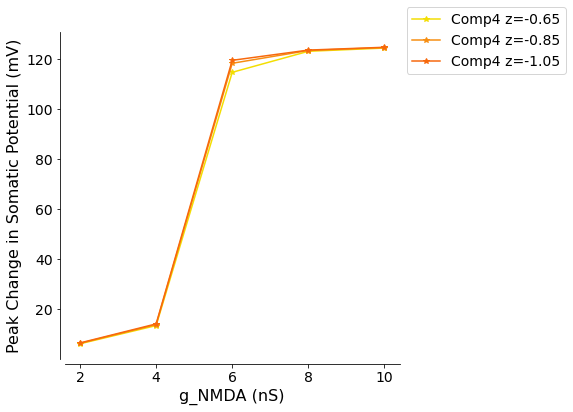

In [70]:
g_exc = ['2','4','6','8','10']
z_arr = ['Comp4 z=-0.65','Comp4 z=-0.85','Comp4 z=-1.05']


peak_soma_v_arr_z1 = []
peak_soma_v_arr_z1.append(round(5.96951,2))
peak_soma_v_arr_z1.append(round(13.25596,2))
peak_soma_v_arr_z1.append(round(114.72923,2))
peak_soma_v_arr_z1.append(round(123.14631,2))
peak_soma_v_arr_z1.append(round(124.45274,2))
#peak_soma_v_arr_z1.append(round(15.970168652566793,2))

peak_soma_v_arr_z2 = []
peak_soma_v_arr_z2.append(round(6.15975,2))
peak_soma_v_arr_z2.append(round(13.64238,2))
peak_soma_v_arr_z2.append(round(118.34569,2))
peak_soma_v_arr_z2.append(round(123.467773,2))
peak_soma_v_arr_z2.append(round(124.65077,2))

peak_soma_v_arr_z3 = []
peak_soma_v_arr_z3.append(round(6.30855,2))
peak_soma_v_arr_z3.append(round(13.94379,2))
peak_soma_v_arr_z3.append(round(119.54231,2))
peak_soma_v_arr_z3.append(round(123.63596,2))
peak_soma_v_arr_z3.append(round(124.76548,2))



fig_b,ax_1 = mplt.subplots(1,1,figsize=(6,6))
sns.despine(offset=5)
ax_1.plot(g_exc,peak_soma_v_arr_z1,"*-", label =z_arr[0],color='#F3DE02')
ax_1.plot(g_exc,peak_soma_v_arr_z2,"*-", label =z_arr[1],color= '#F78E12')
ax_1.plot(g_exc,peak_soma_v_arr_z3,"*-", label =z_arr[2], color = '#F7680C')




ax_1.set_ylabel("Peak Change in Somatic Potential (mV)", fontsize=16)
ax_1.set_xlabel("g_NMDA (nS)", fontsize=16)
ax_1.tick_params(axis='y', which='major', labelsize=14)
ax_1.tick_params(axis='x', which='major', labelsize=14)
ax_1.legend(fontsize =14, bbox_to_anchor=(1,1.1),loc='upper left')